In [33]:
# Following the Tutorial 
# https://realpython.com/python-opencv-color-spaces/
import cv2

import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Save color space conversions into a list
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(len(flags))
flags[40]

274


'COLOR_BGR2HLS'

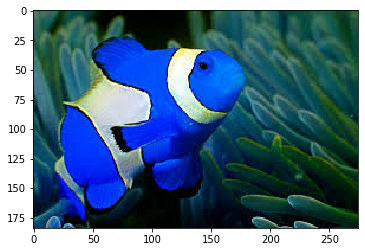

In [35]:
nemo = cv2.imread('/home/andrew/Github/neuralink-bot/image_manipulation/color_segmentation/nemo0.jpg')
plt.imshow(nemo)
plt.show()

Apparently OpenCV defaults to the BGR format, I will need to remember this when working with images in the future

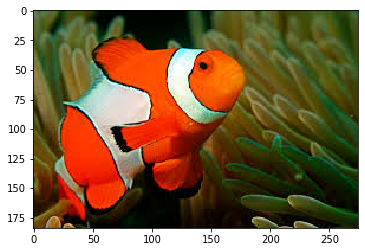

In [36]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

Much better

# 3D Plots

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

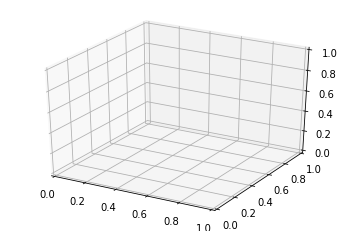

In [42]:
# .split looks like a really useful function. I need to remember that...
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

Wow I forgot how cool 3d plot look!!!

In [43]:
# Normalize the colors ranging from 0 --> 255 to 0 --> 1
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [44]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

# Converting to HSV

In [45]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

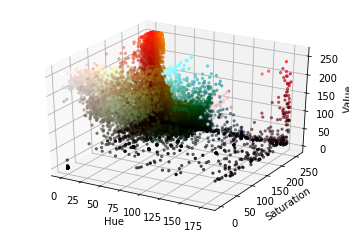

In [46]:
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

# Picking out specific colors

In [73]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

# Important Note:
Matplotlib only accepts colors in RGB. If we are working with rich color representations that cv2 offers, we need to convert from that representation to RGB

In [74]:
from matplotlib.colors import hsv_to_rgb

In [75]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

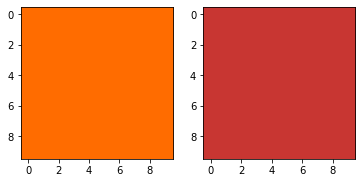

In [76]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [52]:
# Mask takes the image, the lower range, and the higher range
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [53]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

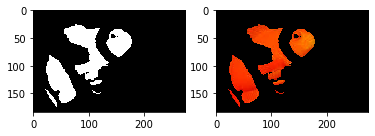

In [54]:
# To visualize lets see the mask and the original image with the mask super imposed
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [56]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)